In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("laptop_data_cleaned.csv")

In [3]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


PPI → Görüntü/netlik ölçüsü (piksel yoğunluğu)

LPS → Hız ölçüsü (satır işleme hızı)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [5]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [6]:
df.corr(numeric_only=True)

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.389134,0.680519,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.389134,1.000000,0.151386,-0.292288,0.023966,-0.319499,0.510876,-0.056985
Price,0.680519,0.151386,1.000000,0.194289,0.279240,0.480687,-0.097361,0.658808
TouchScreen,0.113316,-0.292288,0.194289,1.000000,0.136973,0.452107,-0.205105,0.252142
Ips,0.202809,0.023966,0.279240,0.136973,1.000000,0.288833,-0.090411,0.215197
Ppi,0.294927,-0.319499,0.480687,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,0.097340,0.510876,-0.097361,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.599552,-0.056985,0.658808,0.252142,0.215197,0.499899,-0.400625,1.000000


# EDA

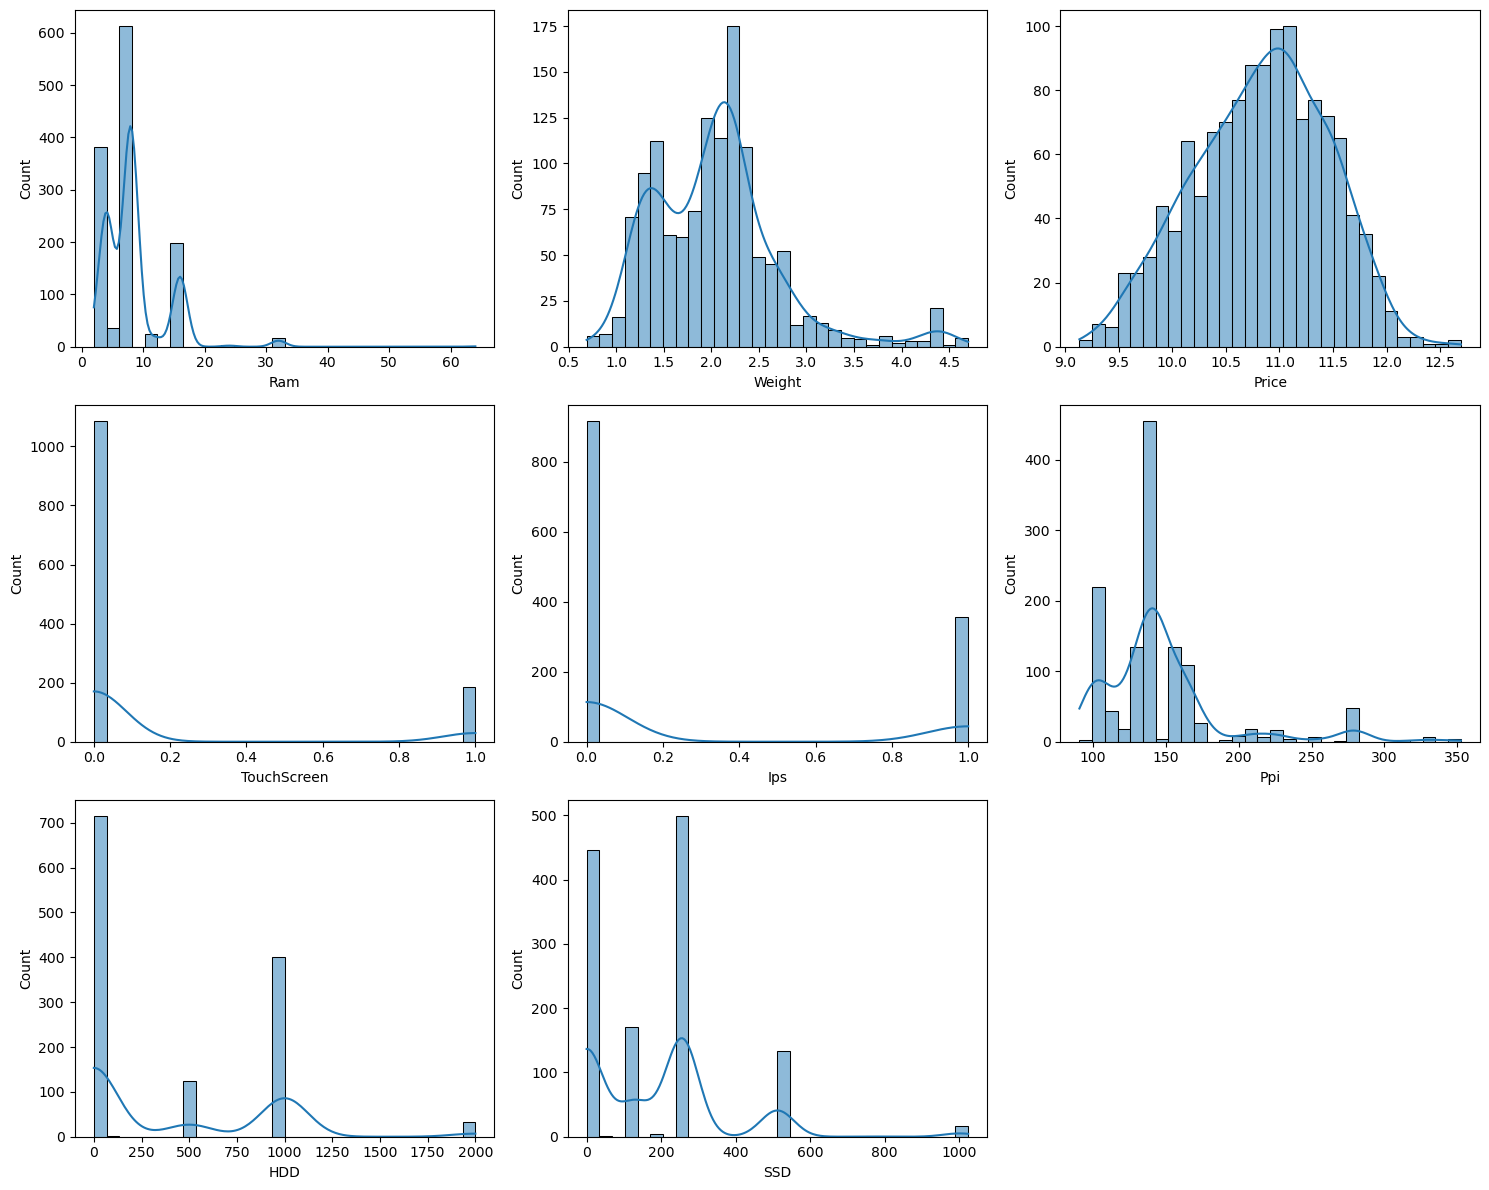

In [7]:
import math

num_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(num_cols,1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
plt.tight_layout()
plt.show()

- Price burada bize sanırım rupeesin logaritması olarak verilmiş. O yüzden çıktıya aşağıdaki işlemi yapacağız.
- y_pred_log = model.predict(X_test)
- y_pred_real_inr = np.exp(y_pred_log)

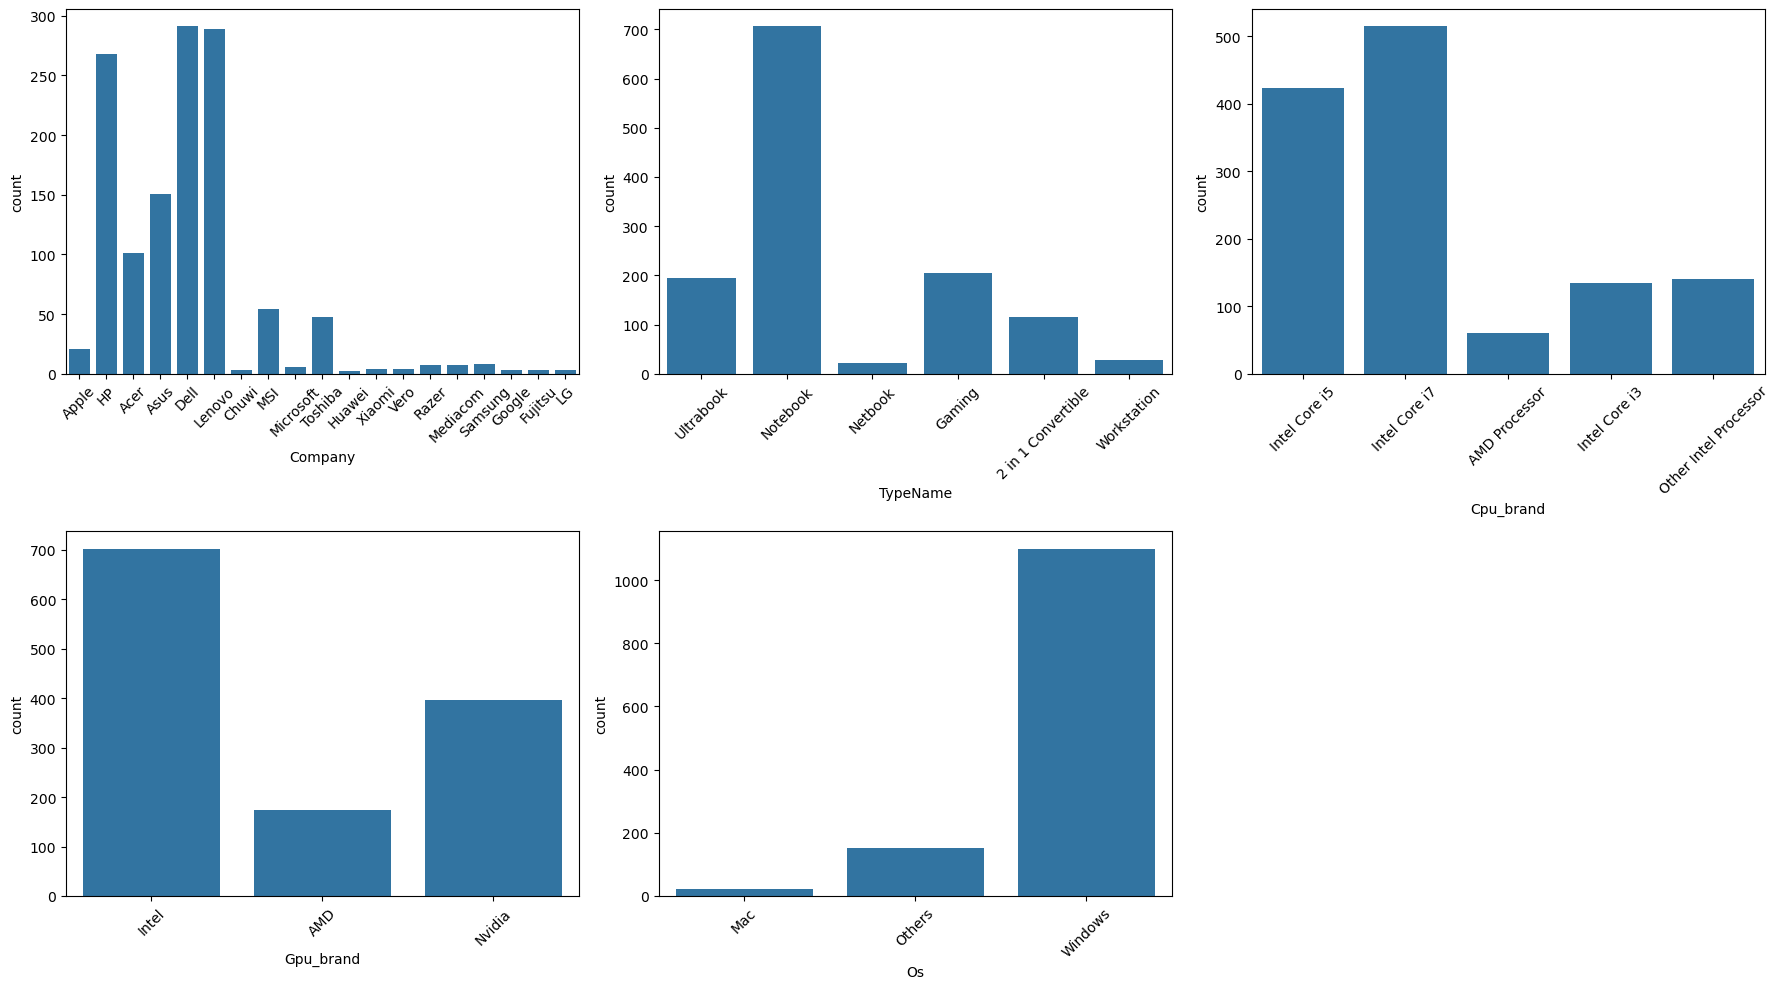

In [8]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

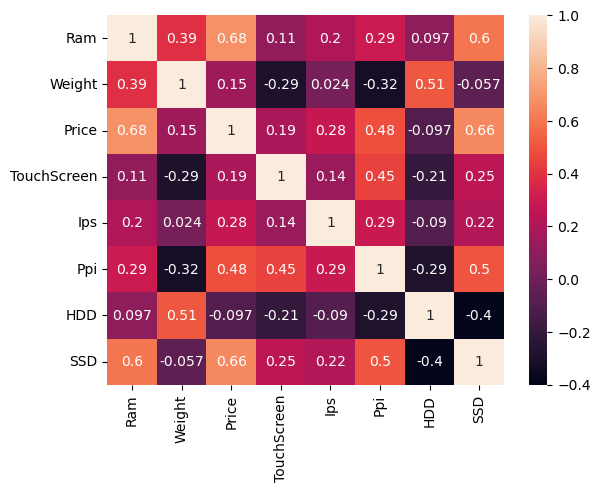

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

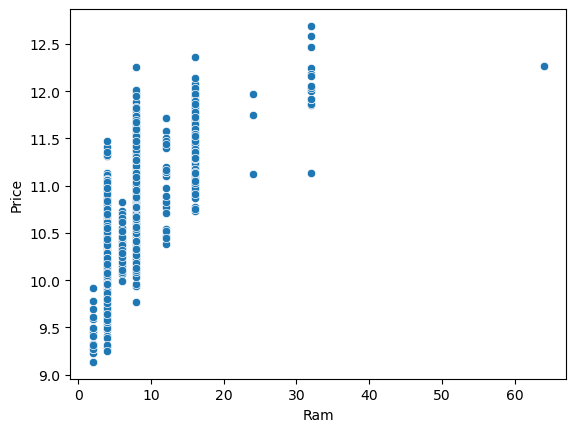

In [10]:
sns.scatterplot(df, x='Ram', y='Price')
plt.show()

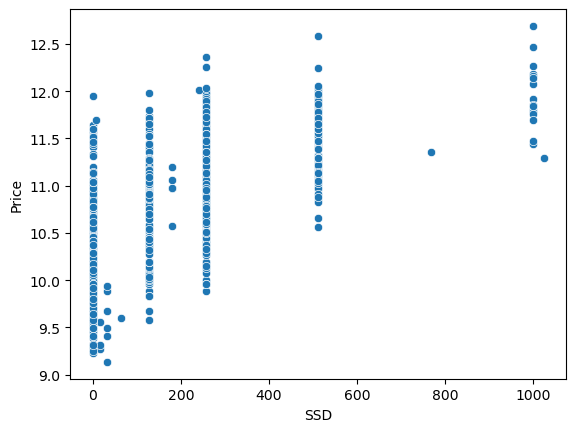

In [11]:
sns.scatterplot(df, x='SSD', y='Price')
plt.show()

# Encoding

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
cat_cols

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

In [23]:
encoders = {}

# Boş dataframeler hazırlayıp içlerine ekleme yapacağım.
X_train_encoded = pd.DataFrame(index=X_train.index)
X_test_encoded = pd.DataFrame(index=X_test.index)

for col in cat_cols:
    encoders[col] = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

    # İlgili kolonu encode et
    train_col = encoders[col].fit_transform(X_train[[col]])
    test_col = encoders[col].transform(X_test[[col]])

    # Kolon isimlerini al
    col_names = encoders[col].get_feature_names_out([col])

    # İlk başta oluşturduğum dataFrame'e ekle
    X_train_encoded = pd.concat([X_train_encoded, pd.DataFrame(train_col, columns=col_names, index=X_train.index)], axis = 1)
    X_test_encoded = pd.concat([X_test_encoded, pd.DataFrame(test_col, columns=col_names, index=X_test.index)], axis = 1)


# Numerik olanları da dataframe'e ekle
num_cols = [col for col in X_train.columns if col not in cat_cols]
X_train_encoded = pd.concat([X_train_encoded, X_train[num_cols]], axis=1)
X_test_encoded = pd.concat([X_test_encoded, X_test[num_cols]], axis=1)

# Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

In [30]:
X_train_scaled

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,...,Gpu_brand_Nvidia,Os_Others,Os_Windows,Ram,Weight,TouchScreen,Ips,Ppi,HDD,SSD
0,-0.12639,-0.349790,-0.045835,1.831984,-0.056166,-0.045835,-0.532901,-0.032393,-0.045835,-0.531280,...,1.528288,-0.34979,0.377512,4.436409,3.719927,-0.418183,-0.595914,-0.454958,1.126585,0.351239
1,-0.12639,-0.349790,-0.045835,-0.545856,-0.056166,-0.045835,1.876520,-0.032393,-0.045835,-0.531280,...,1.528288,-0.34979,0.377512,-0.491522,-0.687908,-0.418183,1.678094,0.236315,-0.782949,0.351239
2,-0.12639,-0.349790,-0.045835,-0.545856,-0.056166,-0.045835,-0.532901,-0.032393,-0.045835,-0.531280,...,-0.654327,-0.34979,0.377512,-0.112450,-0.812073,-0.418183,1.678094,0.236315,-0.782949,-0.326508
3,-0.12639,-0.349790,-0.045835,-0.545856,-0.056166,-0.045835,1.876520,-0.032393,-0.045835,-0.531280,...,-0.654327,-0.34979,0.377512,-0.112450,-0.284374,-0.418183,-0.595914,-0.135372,-0.782949,0.351239
4,-0.12639,-0.349790,-0.045835,-0.545856,-0.056166,-0.045835,1.876520,-0.032393,-0.045835,-0.531280,...,-0.654327,-0.34979,0.377512,-0.112450,-0.284374,-0.418183,-0.595914,-0.135372,-0.782949,0.351239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,-0.12639,2.858859,-0.045835,-0.545856,-0.056166,-0.045835,-0.532901,-0.032393,-0.045835,-0.531280,...,1.528288,-0.34979,0.377512,-0.112450,0.881219,-0.418183,1.678094,-0.135372,1.126585,0.351239
950,-0.12639,-0.349790,-0.045835,1.831984,-0.056166,-0.045835,-0.532901,-0.032393,-0.045835,-0.531280,...,-0.654327,-0.34979,0.377512,-0.870593,0.243324,-0.418183,-0.595914,-1.074056,1.126585,-1.004255
951,-0.12639,-0.349790,-0.045835,-0.545856,-0.056166,-0.045835,-0.532901,-0.032393,-0.045835,1.882248,...,-0.654327,-0.34979,0.377512,-0.112450,-1.029360,-0.418183,1.678094,0.671189,-0.782949,0.351239
952,-0.12639,-0.349790,-0.045835,-0.545856,-0.056166,-0.045835,-0.532901,-0.032393,-0.045835,1.882248,...,1.528288,-0.34979,0.377512,4.436409,0.739982,-0.418183,1.678094,3.116888,-0.782949,4.290644


# Model Fitting

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [32]:
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'SVR' : SVR(),
    'KNN' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Adaboost Regressor' : AdaBoostRegressor(),
    'Gradientboost Regressor' : GradientBoostingRegressor(),
    'RandomForest Regressor' : RandomForestRegressor(),
    'XGBoost' : XGBRegressor(),
    'LGBM' : LGBMRegressor()
}

In [35]:
from sklearn.metrics import r2_score

In [39]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)

    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    print(list(models.keys())[i])
    print("Train Score:", r2_score(y_train, y_pred_train))
    print("Test Score:", r2_score(y_test, y_pred_test))
    print("------------------------------------")

Linear Regression
Train Score: 0.8256018819422264
Test Score: 0.8332667295438845
------------------------------------
Ridge
Train Score: 0.8256022644993994
Test Score: 0.8334919869672516
------------------------------------
Lasso
Train Score: 0.0
Test Score: -0.006060329573800649
------------------------------------
SVR
Train Score: 0.9198599468113927
Test Score: 0.8682868275862055
------------------------------------
KNN
Train Score: 0.8763190116980187
Test Score: 0.8415549958398869
------------------------------------
Decision Tree
Train Score: 0.9965684138074148
Test Score: 0.8183427142853417
------------------------------------
Adaboost Regressor
Train Score: 0.8112736434189604
Test Score: 0.8052934136300967
------------------------------------
Gradientboost Regressor
Train Score: 0.9053231191908698
Test Score: 0.8798886908821822
------------------------------------
RandomForest Regressor
Train Score: 0.9790782653211879
Test Score: 0.8879640800067147
-------------------------------

# Random Forest Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [41]:
params = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [None, 3, 5, 10, 20],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 2, 5, 10],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [45]:
random = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=params,
    cv = 5,
    verbose=0,
    scoring = 'r2'
                     )

In [46]:
random.fit(X_train_scaled, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1600 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='r2')

In [47]:
y_pred_train = random.predict(X_train_scaled)
y_pred_test = random.predict(X_test_scaled)
    
print("Train Score:", r2_score(y_train, y_pred_train))
print("Test Score:", r2_score(y_test, y_pred_test))

Train Score: 0.978010649777414
Test Score: 0.8952976289226914


In [48]:
random.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

# LightGBM Hyperparameter Tuning

In [50]:
params = {
    'n_estimators' : [50, 100, 200, 500, 1000],
    'learning_rate' : [0.01, 0.05, 0.1, 0.3],
    'max_depth' : [-1, 3, 5, 10, 20],
    'num_leaves' : [15, 50, 31, 100],
    'min_data_in_leaf' : [10, 20, 50, 100],
    'subsample' : [0.5, 0.7, 0.9],
    'colsample_bytree' : [0.5, 0.7, 0.9]
}

In [52]:
lgbmGrid = GridSearchCV(
    estimator=LGBMRegressor(),
    param_grid= params,
    verbose=0,
    n_jobs=-1,
    scoring = 'r2',
    cv = 5
)

In [53]:
lgbmGrid.fit(X_train_scaled, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 954, number of used features: 27
[LightGBM] [Info] Start training from score 10.840768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [-1, 3, 5, 10, 20],
                         'min_data_in_leaf': [10, 20, 50, 100],
                         'n_estimators': [50, 100, 200, 500, 1000],
                         'num_leaves': [15, 50, 31, 100],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='r2')

In [54]:
y_pred_train = lgbmGrid.predict(X_train_scaled)
y_pred_test = lgbmGrid.predict(X_test_scaled)
    
print("Train Score:", r2_score(y_train, y_pred_train))
print("Test Score:", r2_score(y_test, y_pred_test))

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Train Score: 0.9610911915400362
Test Score: 0.8947514252749655


In [55]:
lgbmGrid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': -1,
 'min_data_in_leaf': 10,
 'n_estimators': 1000,
 'num_leaves': 31,
 'subsample': 0.5}

# Final Model

In [57]:
randomForestModel = RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=50)

In [58]:
randomForestModel.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=50)

In [59]:
y_pred = randomForestModel.predict(X_test_scaled)

In [60]:
r2_score(y_test, y_pred)

0.8909314139518113

# Model Saving

In [56]:
import pickle

In [61]:
with open("model_encoder_scaler.pkl", "wb") as f:
    pickle.dump(
        {
            'model' : randomForestModel,
            'encoder' : encoders,
            'scaler' : scaler
        },f
    )

In [62]:
X_test_scaled.to_csv("testdata.csv", index=False)